<a href="https://colab.research.google.com/github/LuisSilvaS/Machine_Learning/blob/main/Decison_Tree_IMD1101_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading Diabetis.csv
from google.colab import files
import pandas as pd
from numpy import mean
from numpy import std
import io
uploaded = files.upload()
dados = pd.read_csv(io.BytesIO(uploaded['Diabetes.csv']))
print(dados)
# usar Decision Tree Classifier no sklearn
# Load libraries
from sklearn.tree import DecisionTreeClassifier #
# Import Decision Tree Classifier
from sklearn.model_selection import KFold # Import kfold function
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

Saving Diabetes.csv to Diabetes (1).csv
     preg  plas  pres  skin  insu  mass   pedi  age           classe
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]


In [ ]:
#split dataset in features and target variable
feature_cols = ['preg','plas','pres','skin','insu','mass','pedi','age']
X = dados[feature_cols] # Features
y = dados.classe # Target variable
# 10-fold CV
kf = KFold(n_splits=10, random_state=1, shuffle=True)
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
  print(f'Fold:{cnt}, Train set: {len(train_index)}, Testset:{len(test_index)}')
cnt += 1

Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 691, Testset:77
Fold:1, Train set: 692, Testset:76
Fold:1, Train set: 692, Testset:76


https://www.dropbox.com/sh/fhkqy2wybxjl0n5/AAABevgbnnM4HSdPgeUU6tgPa?dl=0

Accuracy: 0.752 (0.042)


array([[424,  76],
       [114, 154]])

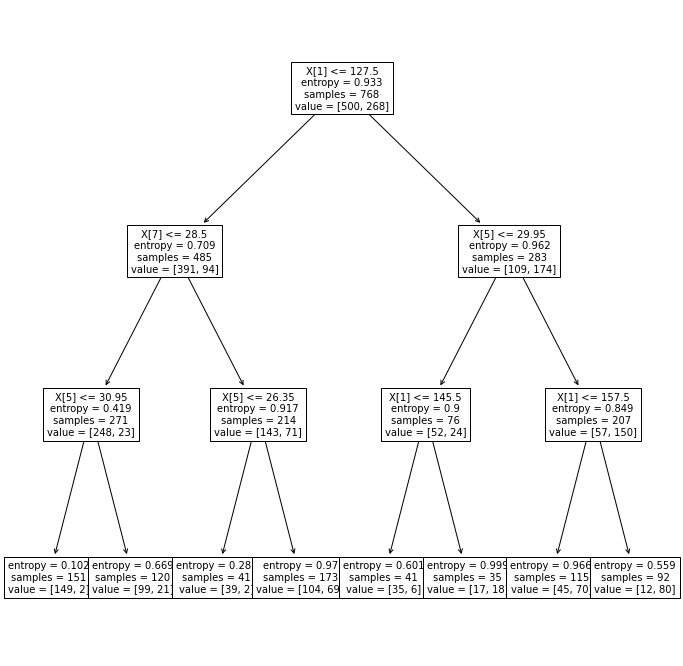

In [ ]:
# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# Mostrando (plotando) a árvore gerada
from sklearn import tree
import matplotlib.pyplot as plt
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))
# Treinamento de um holdout 50-50 para observação da arvore gerada.
dtc.fit(X, y)
tree.plot_tree(dtc, fontsize=10)
# Matriz de confusão p/ kf
y_pred = cross_val_predict(dtc, X, y, cv=kf)
confusion_matrix(y, y_pred)

Accuracy: 0.752 (0.042)


array([[424,  76],
       [114, 154]])

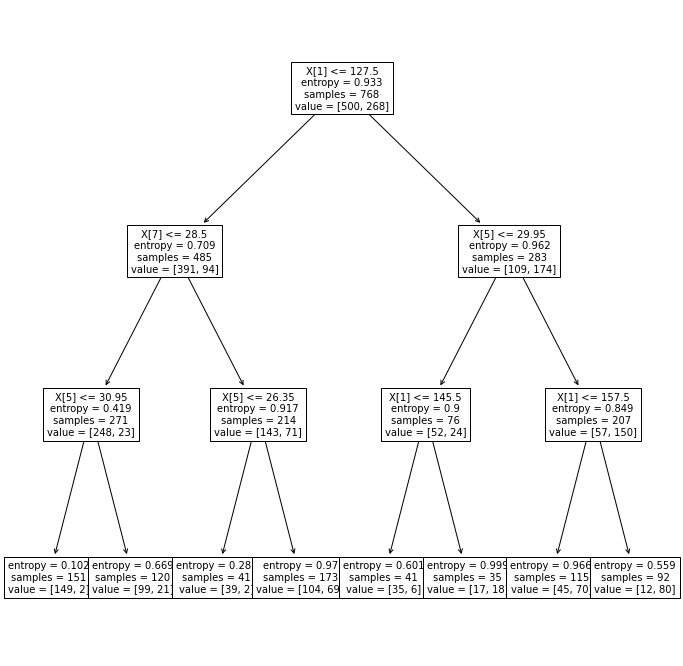

In [ ]:
# Model Accuracy
scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=kf)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
# Mostrando (plotando) a árvore gerada
from sklearn import tree
import matplotlib.pyplot as plt
# set plot size (denoted in inches)
plt.figure(figsize=(12,12))
# Treinamento de um holdout 50-50 para observação da arvore gerada.
dtc.fit(X, y)
tree.plot_tree(dtc, fontsize=10)
# Matriz de confusão p/ kf
y_pred = cross_val_predict(dtc, X, y, cv=kf)
confusion_matrix(y, y_pred)